In [ ]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.2.1
Uninstalling scikit-learn-1.2.1:
  Successfully uninstalled scikit-learn-1.2.1


In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 34.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
path_to_file = '/content/drive/My Drive/Colab Notebooks/'

Mounted at /content/drive/


In [ ]:
import time, psutil
import sklearn
print ('sklearn version: ', sklearn.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sklearn version:  1.2.1


In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

########################
X, y = load_wine(as_frame=True, return_X_y=True) # available from version >=0.23
########################

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    random_state=0)
X_train.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
34,13.51,1.80,2.65,19.0,110.0,2.35,2.53,0.29,1.54,4.2,1.10,2.87,1095.0
114,12.08,1.39,2.50,22.5,84.0,2.56,2.29,0.43,1.04,2.9,0.93,3.19,385.0
62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.8,1.23,2.46,630.0


How it was before : 



```
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)
print (type(X_test_scaled))

>>> <class 'numpy.ndarray'>

```

How it is now with new version: 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas") #change here

scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
148,0.367512,0.797186,0.012394,0.526531,-0.505743,-0.615868,-1.244618,0.697091,-0.601275,1.456259,-1.834178,-1.434207,-0.321993
24,0.589634,-0.452437,0.836577,0.095143,-0.216125,0.369817,0.568623,-0.725402,0.088118,-0.649359,0.742235,1.768243,0.280612
105,-0.743096,0.194221,-0.381781,0.670327,-0.650552,-1.026571,-0.186077,2.454287,-0.315429,-1.001728,-0.432971,1.011300,-1.357238


In [ ]:
print (type(X_test_scaled))

<class 'pandas.core.frame.DataFrame'>


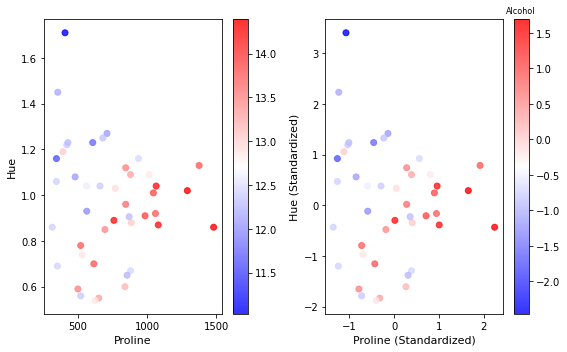

In [ ]:
fig = plt.figure(figsize=(8, 5))
fig.add_subplot(121)
plt.scatter(X_test['proline'], X_test['hue'], c=X_test['alcohol'], alpha=0.8, cmap='bwr')
clb = plt.colorbar()

plt.xlabel('Proline', fontsize=11)
plt.ylabel('Hue', fontsize=11)
fig.add_subplot(122)
plt.scatter(X_test_scaled['proline'], X_test_scaled['hue'], c=X_test_scaled['alcohol'], alpha=0.8, cmap='bwr') 
# pretty easy now in the newer version to see the effect
plt.xlabel('Proline (Standardized)', fontsize=11)
plt.ylabel('Hue (Standardized)', fontsize=11)
clb = plt.colorbar()
clb.ax.set_title('Alcohol', fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
### set output can also be applied after we build a pipeline 

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC())

clf.set_output(transform="pandas")
svm_fit = clf.fit(X_train, y_train)

print(type(svm_fit), svm_fit)


<class 'sklearn.pipeline.Pipeline'> Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])


In [ ]:
print (svm_fit[-1].feature_names_in_, '\n', svm_fit[-2].feature_names_in_)

['alcohol' 'malic_acid' 'ash' 'alcalinity_of_ash' 'magnesium'
 'total_phenols' 'flavanoids' 'nonflavanoid_phenols' 'proanthocyanins'
 'color_intensity' 'hue' 'od280/od315_of_diluted_wines' 'proline'] 
 ['alcohol' 'malic_acid' 'ash' 'alcalinity_of_ash' 'magnesium'
 'total_phenols' 'flavanoids' 'nonflavanoid_phenols' 'proanthocyanins'
 'color_intensity' 'hue' 'od280/od315_of_diluted_wines' 'proline']


In [ ]:
print (clf[:-1])
print ('check that set_output format indeed remains even after we build a pipleline: ', '\n')
X_test_transformed = clf[:-1].transform(X_test)

X_test_transformed.head(3)

Pipeline(steps=[('standardscaler', StandardScaler())])
check that set_output format indeed remains even after we build a pipleline:  



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
148,0.367512,0.797186,0.012394,0.526531,-0.505743,-0.615868,-1.244618,0.697091,-0.601275,1.456259,-1.834178,-1.434207,-0.321993
24,0.589634,-0.452437,0.836577,0.095143,-0.216125,0.369817,0.568623,-0.725402,0.088118,-0.649359,0.742235,1.768243,0.280612
105,-0.743096,0.194221,-0.381781,0.670327,-0.650552,-1.026571,-0.186077,2.454287,-0.315429,-1.001728,-0.432971,1.011300,-1.357238


In [ ]:
## pandas parser in fetch_openml for efficient memory usage (not available before)

from sklearn.datasets import fetch_openml

start_t = time.time()
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True, parser="pandas")

# parser pandas is the addition in the version 1.2.0

X = X.select_dtypes(["number", "category"]).drop(columns=["body"])
print ('check types: ', type(X), '\n',  X.head(3))
print ('check shapes: ', X.shape)
end_t = time.time()
print ('time taken: ', end_t-start_t)
process_names = [proc.name() for proc in psutil.process_iter()]
print (process_names)
print(psutil.cpu_percent())

check types:  <class 'pandas.core.frame.DataFrame'> 
    pclass     sex      age  sibsp  parch      fare embarked
0       1  female  29.0000      0      0  211.3375        S
1       1    male   0.9167      1      2  151.5500        S
2       1  female   2.0000      1      2  151.5500        S
check shapes:  (1309, 7)
time taken:  0.03028082847595215
['docker-init', 'node', 'tail', 'oom_monitor.sh', 'run.sh', 'kernel_manager_proxy', 'python3', 'colab-fileshim.', 'jupyter-noteboo', 'dap_multiplexer', 'python3', 'python3', 'node', 'sleep']
11.6


In [ ]:
print (X.shape)
X.head(3)

(1309, 7)


,pclass,sex,age,sibsp,parch,fare,embarked
0,1,female,29.0000,0,0,211.3375,S
1,1,male,0.9167,1,2,151.5500,S
2,1,female,2.0000,1,2,151.5500,S


In [ ]:
y.head(3)

0    1
1    1
2    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

In [ ]:
### drop nans
print ('check for nans in cols: ', X.isna().sum()) 
X_nonan = X.dropna(how='any', inplace=False)
print ('check new shapes: ', X_nonan.shape)

check for nans in cols:  pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64
check new shapes:  (1043, 7)


In [ ]:
nonan_indices = X_nonan.index.to_list()
y_nonan = y[y.index.isin(nonan_indices)]
print ('check shape y: ', y_nonan.shape)
#print ('check for indices: ', X_nonan.index.to_list())

check shape y:  (1043,)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor #HistGradientBoostingRegressor
from sklearn.compose import ColumnTransformer

categorical_features = ["pclass", "sex", "embarked"]
model = make_pipeline(ColumnTransformer(transformers=[("cat", OrdinalEncoder(), categorical_features)], 
                                        remainder="passthrough",), 
                      GradientBoostingRegressor(random_state=0),).fit(X_nonan, y_nonan) 
# gradientboosting regressor doesn't work with nan entries                      

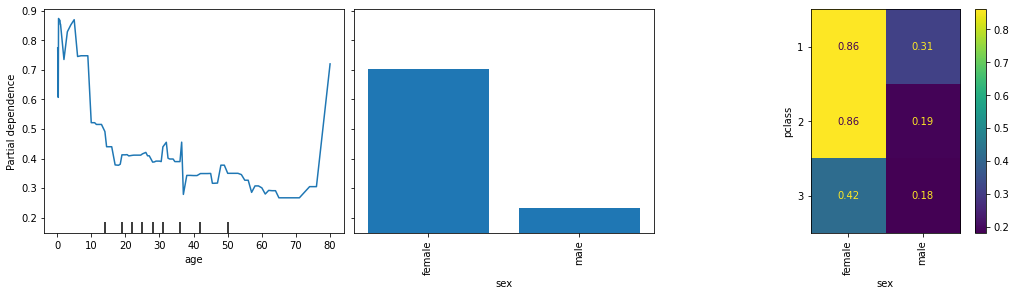

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(14, 4), constrained_layout=True)
disp = PartialDependenceDisplay.from_estimator(model, 
                                               X_nonan, features=["age", "sex", ("pclass", "sex")], 
                                               categorical_features=categorical_features, ax=ax,)
fig.savefig(path_to_file + './part_disp.png', dpi=200)

How it was before: 

```
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('GradientBoostingRegressor')
GBR_disp = plot_partial_dependence(model, X_NotNan, ['age', 'sex', ('age', 'sex')], ax=ax)
```
Ends with a `ValueError`

`ValueError: could not convert string to float: 'female'`


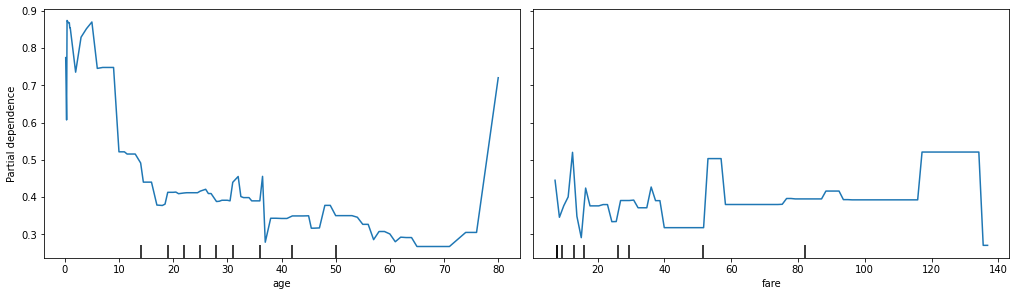

In [ ]:
fig, ax = plt.subplots(figsize=(14, 4), constrained_layout=True)
disp = PartialDependenceDisplay.from_estimator(model, 
                                               X_nonan, features=["age", "fare", ], ax=ax,) 

In [ ]:
complete_df = pd.concat([X_nonan, y_nonan], axis=1, join='inner').reindex(X_nonan.index)
complete_df.head(3)

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.0000,0,0,211.3375,S,1
1,1,male,0.9167,1,2,151.5500,S,1
2,1,female,2.0000,1,2,151.5500,S,0


In [ ]:
complete_df.dtypes

pclass         int64
sex         category
age          float64
sibsp          int64
parch          int64
fare         float64
embarked    category
survived    category
dtype: object

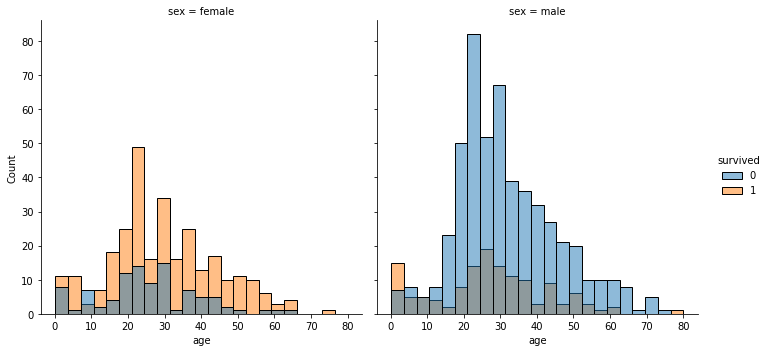

In [ ]:
import seaborn as sns
sns.displot(data=complete_df, 
            x="age", hue="survived", col="sex", 
            kind="hist", )

<AxesSubplot:xlabel='age', ylabel='fare'>

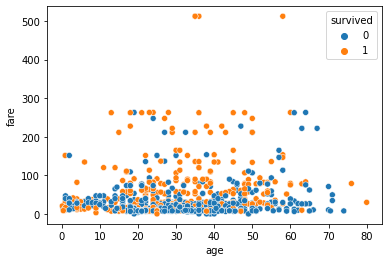

In [ ]:
sns.scatterplot(data=complete_df, x='age', y='fare', hue='survived')

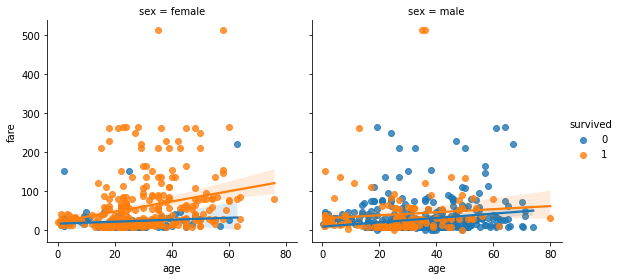

In [ ]:
sns.lmplot(data=complete_df, x="age", y="fare", 
           hue="survived", col="sex", height=4,)


### Updated Metrics for Directly Plotting Residuals (Regression)

Similar plotting routines existed for classification tasks (like precision v recall) 

`metrics.PrecisionRecallDisplay`  `metrics.RocCurveDisplay`

New added metric for regression task: 

`metrics.PredictionErrorDisplay`

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes

X_db, y_db = load_diabetes(return_X_y=True, as_frame=True)
#print cancer.keys()

print (X_db.head(3))

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  


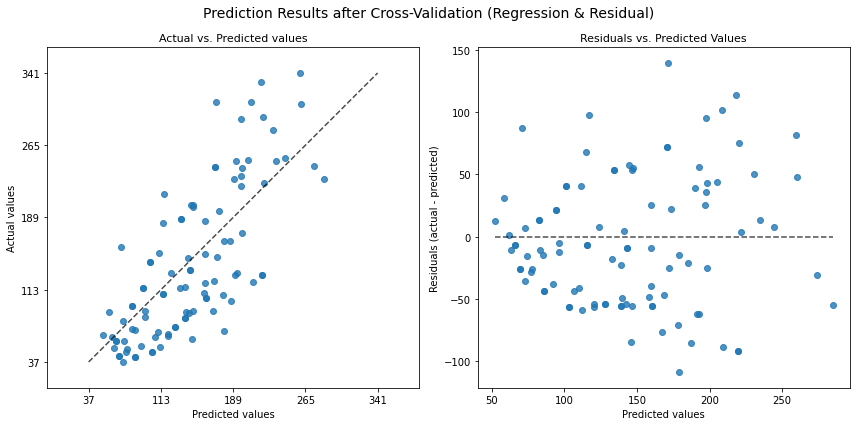

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import PredictionErrorDisplay

lasso001 = Lasso(alpha=0.01, max_iter=int(10e5))



y_pred = cross_val_predict(lasso001, X_db, y_db, cv=5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
PredictionErrorDisplay.from_predictions(y_db, y_pred=y_pred, 
                                        kind="actual_vs_predicted", 
                                        subsample=100, 
                                        ax = ax1,
                                        random_state=0,)

ax1.set_title("Actual vs. Predicted values", fontsize=11)

PredictionErrorDisplay.from_predictions(y_db, 
                                        y_pred=y_pred, 
                                        kind="residual_vs_predicted", 
                                        subsample=100,
                                        ax = ax2,
                                        random_state=0,)

ax2.set_title("Residuals vs. Predicted Values", fontsize=11)
fig.suptitle("Prediction Results after Cross-Validation (Regression & Residual)", fontsize=14)
plt.tight_layout()
plt.show()
